# Project: Wrangling and Analyze Data

In [1]:
import requests
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [4]:
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
# response.content

In [5]:
image_predictions_df = pd.read_csv('./image-predictions.tsv', sep='\t')
image_predictions_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API



I can't set up a Twitter developer account using the steps above, so I download the file tweet_json.txt from udacity

In [7]:
#Reading the text file in json format
# with open('tweet-json.txt', 'r',encoding='utf-8') as file:
#     data = json.load(file)
with open('tweet-json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))    


In [8]:
tweets_info_list = []
for tweet in status:
    tweet_id  = tweet['id']
    retweets  = tweet['retweet_count']
    favourites= tweet['favorite_count']
    followers = tweet['user']['followers_count']
    friends   = tweet['user']['friends_count']
    tweets_info_list.append({'tweet_id'  : tweet_id,
                             'retweets'  : retweets,
                             'favorites' : favourites,
                             'followers' : followers, 
                             'friends'   : friends     })
    
tweets_info_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends'])
tweets_info_df.sample(5)

,tweet_id,retweets,favorites,followers,friends
1215,714962719905021952,4816,8028,3200947,104
1359,703079050210877440,3494,8064,3200949,104
1836,675898130735476737,653,1774,3201002,104
877,760641137271070720,1481,5485,3200908,104
1554,688828561667567616,420,1508,3200951,104


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



###  Assessing archive_df DataFrame

In [9]:
# Display the archive_df table
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# checking for datatypes and missing data
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# statistic description
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# checking for duplicates generally
archive_df.duplicated().sum()

0

In [13]:
# checking for duplicates in the tweet id column
archive_df['tweet_id'].duplicated().sum()

0

In [14]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
# checking the number of unique names
archive_df['name'].nunique()

957

In [16]:
# checking through the top names
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Daisy          7
Buddy          7
Toby           7
Bailey         7
Bella          6
Leo            6
Jax            6
Stanley        6
Scout          6
Milo           6
Koda           6
Jack           6
Oscar          6
Rusty          6
Dave           6
Gus            5
            ... 
Mac            1
Ralphie        1
Dot            1
Adele          1
Ito            1
Meatball       1
Andru          1
Bobbay         1
Ashleigh       1
Kallie         1
Izzy           1
Jennifur       1
Barney         1
Kobe           1
Horace         1
Creg           1
Linus          1
Rolf           1
Sundance       1
Arlo           1
Tyrus          1
Autumn         1
Rambo          1
Fynn           1
Tiger          1
Wesley         1
Orion          1
Akumi         

In [17]:
nameList = archive_df['name'].unique()
nameList.sort()
nameList

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

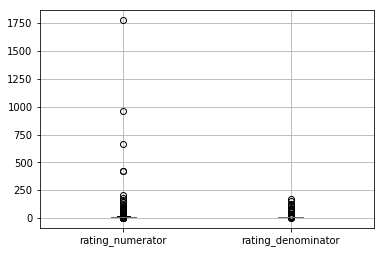

In [18]:
archive_df.boxplot(column= ["rating_numerator", "rating_denominator"])

In [19]:
# check for two or more urls in the expanded urls
archive_df[archive_df["expanded_urls"].str.contains(',', na = False)].expanded_urls.count()

639

In [20]:
print("number of replies", np.isfinite(archive_df.in_reply_to_status_id).sum())

print("number of retweets", np.isfinite(archive_df.retweeted_status_id).sum())

number of replies 78
number of retweets 181


### Quality issues of archive_df DataFrame
1. There are missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls      

2. Column "name" has some bizzard name such as: 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my','not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the','this', 'unacceptable', 'very'

3. Columns "rating_numerator" and "rating_denominator" have anormaly values in the numerator and denominator (1776, 170 respectively)

4. The timestamp has an incorrect datatype - is an object, should be DateTime.

5. Dog 'stage' classification (doggo, floofer, pupper or puppo) should be one column instead of being 4 columns

6. Columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" must be integers instead of float

7. There are 639 row in the expanded_urls that contains two or more urls. 

8. Som tweets in reply and retweeted should be removed.

### Tidiness issues
1. There are some other attributes found in other dataframes.So, we should join all other dataframes to get a final dataframe.

2. Dog stages should be presented into single column in order to reduce the dataframe'size

### Assessing image_predictions_df dataset

In [21]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
#check duplicate jpg_url
sum(image_predictions_df.jpg_url.duplicated())

66

In [25]:
image_predictions_df.shape

(2075, 12)

In [26]:
# check for format jpg and png
image_predictions_df[image_predictions_df["jpg_url"].str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

2075

In [27]:
image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [28]:
#check duplicate tweet_id
sum(image_predictions_df.tweet_id.duplicated())

0

In [29]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality of image_predictions_df



1. There is an inconsistency between image_predictions_df and archive_df. The image_predictions_df dataset has 2075 entries, while twitter archive dataset has 2356 entries.
2. There is 66 duplicate in jpg_url
3. The name of columns is not make sense and do not give much information about the content
4. Dataset should be merged with other dataset


image_predictions_df columns:

- tweet_id: tweet_id is the last part of the tweet URL after "status/"
- jpg_url: Image link or URL
- img_num: Image number
- p1: p1 is the algorithm's #1 prediction for the image in the tweet
- p1_conf: p1_conf is how confident the algorithm is in its #1 prediction
- p1_dog: p1_dog is whether or not the #1 prediction is a breed of dog
- p2: is the algorithm's second most likely prediction
- p2_conf: is how confident the algorithm is in its #2 prediction
- p2_dog: is whether or not the #2 prediction is a breed of dog
- p3: p3 is the algorithm's #3 prediction for the image in the tweet
- p3_conf: p3_conf is how confident the algorithm is in its #3 prediction
- p3_dog: p3_dog is whether or not the #3 prediction is a breed of dog

### Assessing tweets_info_df

In [30]:
tweets_info_df.head()

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104


In [31]:
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
followers    2354 non-null int64
friends      2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


In [32]:
tweets_info_df.describe()

,tweet_id,retweets,favorites,followers,friends
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.0
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06,104.0
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01,0.0
min,6.660209e+17,0.000000,0.000000,3.200799e+06,104.0
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06,104.0
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06,104.0
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06,104.0
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06,104.0


In [33]:
tweets_info_df.tweet_id.is_unique

True

In [34]:
tweets_info_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

### Quality & Tidiness Issues in tweets_info_df
1. archive_df has 2356 entries, while tweets_info_df has 2354.

2. dataset should be merged with the twitter archive dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [35]:
# Make copies of original pieces of data
archive_clean = archive_df.copy()
image_pred_clean = image_predictions_df.copy()
tweets_clean = tweets_info_df.copy()


In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Issue #1: Drop columns not needed for our analysis

#### Define: Drop columns not needed for our analysis

#### Code

In [37]:
#drop columns
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1) 

#### Test

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(8)
memory usage: 202.5+ KB


### Issue #2: Erroneous datatype fix

#### Define: Erroneous datatype fix

#### Code

In [39]:
# Convert tweet_id to str
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(str)

# convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# convert source to category datatype
archive_clean.source = archive_clean.source.astype("category")

#### Test

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null category
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 186.6+ KB


#### Issue #3: 
- Weird names found for dogs - 'a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my','not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the','this', 'unacceptable', 'very'
- Let us clean to ideal name by looking at the text

#### Code

In [41]:
weird_names = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 
              'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 
              'my','not', 'officially', 'old', 'one', 'quite', 'space', 
              'such', 'the','this', 'unacceptable', 'very']

In [42]:
for wname in weird_names:    
     archive_clean.name[archive_clean.name == wname] = 'None'      

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [43]:
archive_clean.name.value_counts()[:10]

None       854
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Name: name, dtype: int64

#### Issue #4: Convert the dog stage or category into one column instead of the multiple columns

In [44]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [45]:
archive_clean.doggo = np.where(archive_clean.doggo != 'None', 1, 0)
archive_clean.floofer = np.where(archive_clean.floofer != 'None', 1, 0)
archive_clean.pupper = np.where(archive_clean.pupper != 'None', 1, 0)
archive_clean.puppo = np.where(archive_clean.puppo != 'None', 1, 0)

archive_clean['stage_count'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [46]:
archive_clean[archive_clean['stage_count'] >=2].sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count
565,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",11,10,None,1,0,1,0,2
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,1,0,1,0,2
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,None,1,1,0,0,2


In [47]:

def dog_stages(archive):
    if archive['stage_count']>= 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['stage_count'] == 1:
            if archive['floofer'] == 1:
                return 'Doggo'
            
            if archive['floofer'] == 1:
                return 'Floofer'
            
            if archive['pupper'] == 1:
                return 'Pupper'
            
            if archive['puppo'] == 1:
                return 'Puppo'
        else:
            return 'None'

archive_clean['dog_stage'] = archive_clean.apply(dog_stages, axis=1)

#### Test

In [48]:
archive_clean[archive_clean.dog_stage=="Multiple"].sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_count,dog_stage
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,1,0,1,0,2,Multiple
1063,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,12,10,None,1,0,1,0,2,Multiple
733,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,1,0,1,0,2,Multiple


In [49]:
archive_clean.dog_stage.value_counts()

None        1976
Pupper       245
Puppo         29
Multiple      14
Doggo          9
Name: dog_stage, dtype: int64

#### Issue #5: Tidiness

#### define:
 
Lets merge 3 datasets.

In [50]:
#merge the two tables
archive_clean = pd.merge(left=archive_clean, right=tweets_clean, how='left', on='tweet_id')
archive_clean = pd.merge(left=archive_clean, right=image_pred_clean, how='left', on='tweet_id')

#### Test

In [51]:
archive_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0,0,0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,0,0,0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,0,0,0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


#### define
 
drop unused columns


In [52]:
# drop columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'stage_count'], axis=1, inplace=True)

#### Test

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null category
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stage             2273 non-null object
retweets              2354 non-null float64
favorites             2354 non-null float64
followers             2354 non-null float64
friends               2354 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                

#### Define: 

In [54]:
archive_clean.dropna(axis = 0, inplace=True)

#### Test

In [55]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id              2006 non-null object
timestamp             2006 non-null datetime64[ns]
source                2006 non-null category
text                  2006 non-null object
rating_numerator      2006 non-null int64
rating_denominator    2006 non-null int64
name                  2006 non-null object
dog_stage             2006 non-null object
retweets              2006 non-null float64
favorites             2006 non-null float64
followers             2006 non-null float64
friends               2006 non-null float64
jpg_url               2006 non-null object
img_num               2006 non-null float64
p1                    2006 non-null object
p1_conf               2006 non-null float64
p1_dog                2006 non-null object
p2                    2006 non-null object
p2_conf               2006 non-null float64
p2_dog                2006 non-null object
p3                

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [57]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [58]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 23 columns):
tweet_id              2006 non-null int64
timestamp             2006 non-null object
source                2006 non-null object
text                  2006 non-null object
rating_numerator      2006 non-null int64
rating_denominator    2006 non-null int64
name                  2006 non-null object
dog_stage             2006 non-null object
retweets              2006 non-null float64
favorites             2006 non-null float64
followers             2006 non-null float64
friends               2006 non-null float64
jpg_url               2006 non-null object
img_num               2006 non-null float64
p1                    2006 non-null object
p1_conf               2006 non-null float64
p1_dog                2006 non-null bool
p2                    2006 non-null object
p2_conf               2006 non-null float64
p2_dog                2006 non-null bool
p3                    2006 non-nu

### Insights:
1. Top Dog_stage values based on the count? Most of the tweets did not categorize the dog stages. With the infomation available, we can said that the dog "pupper" has higher count.

2. What are the majority of the predictions made by 3 algorithms? Majority of the predictions by 3 algorithms is done for golden_retriever, Labrador_retriever and Chihuahua dogs

3. What are the most popular Dog name? 'Charlie' the most popular dog name

### Visualization

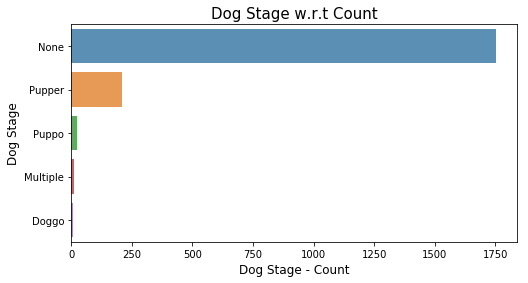

In [76]:
# Top Dog_stage values based on the count
cnt_srs = archive_clean['dog_stage'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Dog Stage - Count', fontsize=12)
plt.ylabel('Dog Stage', fontsize=12)
plt.title("Dog Stage w.r.t Count", fontsize=15)

plt.savefig('Top_dog_stage.png')
plt.show()

Top Dog_stage values based on the count? Most of the tweets did not categorize the dog stages. With the infomation available, we can said that the dog "pupper" has higher count.

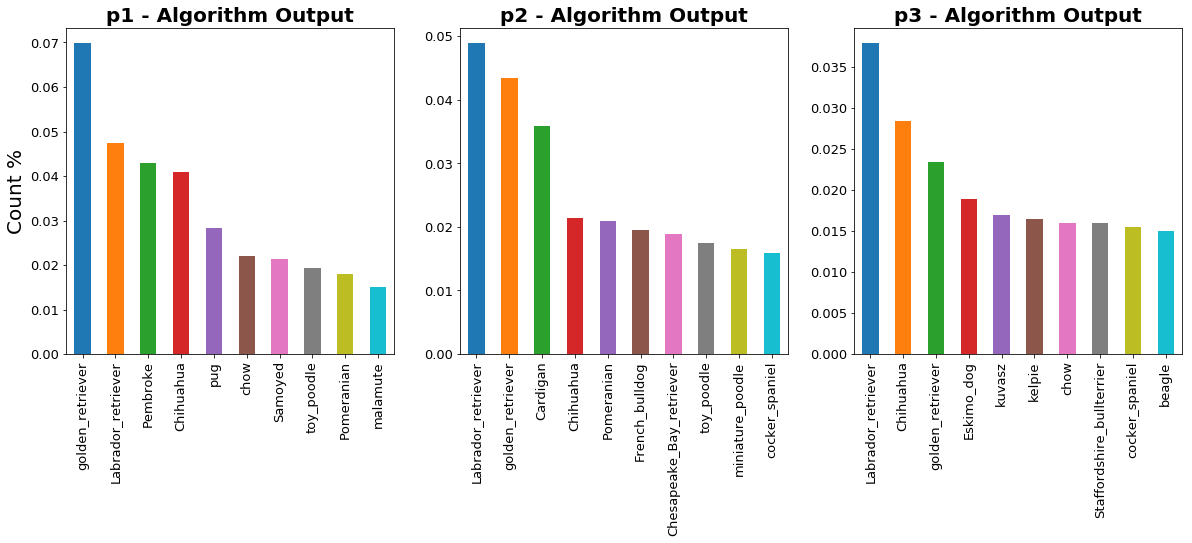

In [66]:
plt.figure()
plt.subplot(131)

archive_clean['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(20,6), fontsize = 13.0)
plt.title('p1 - Algorithm Output', fontweight="bold", fontsize = 20.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
archive_clean['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(20,6), fontsize = 13.0)
plt.title('p2 - Algorithm Output', fontweight="bold", fontsize = 20.0)

plt.subplot(133)
archive_clean['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(20,6), fontsize = 13.0)
plt.title('p3 - Algorithm Output', fontweight="bold", fontsize = 20.0)
plt.savefig('algo.png')

2. What are the majority of the predictions made by 3 algorithms? Majority of the predictions by 3 algorithms is done for golden_retriever, Labrador_retriever and Chihuahua dogs

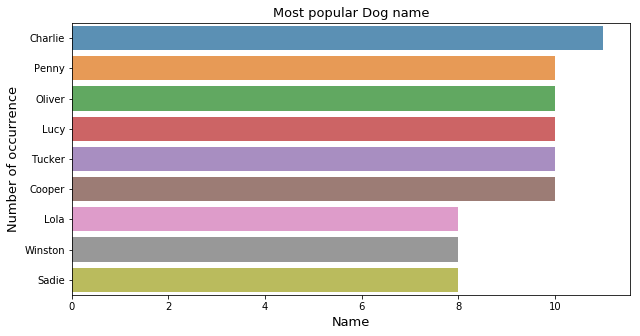

In [75]:
#plot
cnt_srs = archive_clean['name'].value_counts()[1:10]
plt.figure(figsize=(10,5))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)

plt.title('Most popular Dog name', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

plt.savefig('dogname.png')
plt.show()

'Charlie' the most popular dog name

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0